1. Introduction:
News coverage of terrorist groups and attacks often dominate our airways. As we are constantly fed information on our the dire state of our world today. During our lifetime one of the most deadly attacks on U.S. soil happened on 9/11.  Forcing the hand of then President George W. Bush to declare a war on terro. Armed with the information I wanted to take a look at whether the war on terror was indeed successful. 

In [2]:
# Set up enviroment 
import math 
import pandas as pd 
import numpy as np 
from scipy import stats 
import matplotlib.pyplot as plt 
import seaborn as sns

terror = pd.read_csv('terrorism.csv', encoding = "ISO-8859-1")

C:\Users\Kwasi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2. Hypothesis
Ho: There is no significiant differece between the average attacks per year pre war on terror and post war on terror. 

Ha: There is a significant difference between the average number of attacks pre war on terror and post war on terror. 

3. Data 
The data comes from the Global terroris database collected by the University of Maryland. Terrorism is defined by them as "The threatened or actual use of illegal force and violence by a non-stat actor to attain political, economic, religious or a social goal through fear, coercion, or intimidation. 

In [6]:
#get to know the data a bit 
terror.info()
terror.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
#Taking the columns that are needed and renaming them 
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [8]:
#Did the war on terror prove to be a success?
#Evaluating it based on the number of attacks before war on terror 
#Splitting our dataset 

pre_wot= terror[(terror.Year <=2001)]
pre_wot.head()
post_wot = terror[(terror.Year >=2002)]
post_wot.head()
pre_wot.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


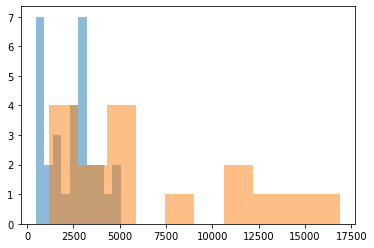

In [9]:
#plot our variables
plt.hist(pre_wot.groupby('Year').count()['Month'], alpha=.5)
plt.hist(post_wot.groupby('Year').count()['Month'], alpha=.5)
plt.show()

In [12]:
#Running Kruskal Stat Test 
stats.kruskal(pre_wot.groupby('Year').count()['Month'],post_wot.groupby('Year').count()['Month'])

KruskalResult(statistic=9.599345326357604, pvalue=0.0019464675416411886)

In [14]:
#Checking Skewness and Kurtorsis of distribution 
print(stats.describe(pre_wot.groupby('Year').count()['Month']))
print(stats.describe(post_wot.groupby('Year').count()['Month']))

DescribeResult(nobs=31, minmax=(471, 5071), mean=2372.7741935483873, variance=1770180.0473118278, skewness=0.09212503013783685, kurtosis=-0.9826847223990454)
DescribeResult(nobs=16, minmax=(1166, 16903), mean=6758.4375, variance=28075493.8625, skewness=0.6467843817319769, kurtosis=-1.0066426339150953)


[[Text(0, 0, 'pre_wot'), Text(0, 0, 'post_wot')]]

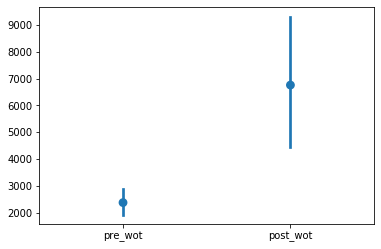

In [15]:
g = sns.pointplot(data=[pre_wot.groupby('Year').count()['Month'],
                        post_wot.groupby('Year').count()['Month']], join=False)
                        
g.set(xticklabels = ['pre_wot', 'post_wot'])

5.Results 
Based on my intial visual analysis, the terrorist attack datat was not normally distributed. So I chose to run a Kruskal statistics test. With a p=value of .002 and a t-stat of 9.59 we can reject our null hypothesis. 

6. Dicussion and Recommendation 
When evaluating the war on terror through the lens of average attack per year, there is no doubt that it has been a tremendous failure. But, its not so easy as pulling troops of the ground and completley different approach. There are still further things to explore within this huge dataset. My next step in this process would be to further investigate the motives behind the attacks. 